In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Perceptrons are artificial neurons that are roughly modeled on neurobiology. The perceptron can be conceptualized as a body, which receives some number of weighted inputs. This body performs the weighted summation of these weights and inputs, comparing it to an internal threshold value. If the weighted sum exceeds the threshold, the output state is +1, otherwise, output state is -1

In [2]:
# import dataset
import dataset

# Our dataset uses chars and not number values: encode the values (bipolar)
def encode(data):
    return [1 if pixel == '#' else -1
               for line in data
               for pixel in line]

train_set = [encode(d) for d in dataset.TRAINING_DATA]
test_set = [encode(d) for d in dataset.TEST_DATA]

Now that we have our data, we can do some superficial analysis to make sure we are on the right track. Our goal is to implement a perceptron for each letter of the English alphabet, for a total of 26 perceptrons.

In [3]:
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 26
len(test_set): 26


This looks good so far. We need to implement 26 perceptrons, and we have 26 items in both the training set and testing sets.

Now we can check the length of our input vector for our letter classifying perceptron.

In [4]:
print(f'len(input_vector): {len(train_set[0])}')

len(input_vector): 35


The letters we are using for our training and testing data are structured as 5x7 blocks, so this seems to check out as well.

Now that we know the length of our input vector, we can initialize our weights vector.

NOTE: In the perceptron model, there is an additional bias input, which is always a weighted +1. We will need to account for this by adding an extra weight to our weight vector.

In [5]:
input_vector = [1] + train_set[0]         # add bias to front of input vector
input_vector = np.asarray(input_vector)   # lets read everything in as numpy arrays now

np.random.seed(1)  # for testing purposes
weight_vector = np.random.uniform(-1, 1, len(input_vector))  # initialize random weights

Once we have our two vectors describing the perceptron network, we can start modeling the rest. Right now we have inputs and their associated weights. With these, we can compute a weighted sum of all the inputs into the perceptron.

In [6]:
weighted_sum = np.dot(weight_vector, input_vector)

print(weight_vector.transpose())
print('-'*80)
print(input_vector)
print('-'*80)
print(weighted_sum)

[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
 -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097  0.370439
 -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904   0.11737966
 -0.71922612 -0.60379702  0.60148914  0.93652315 -0.37315164  0.38464523
  0.7527783   0.78921333 -0.82991158 -0.92189043 -0.66033916  0.75628501
 -0.80330633 -0.15778475  0.91577906  0.06633057  0.38375423 -0.36896874]
--------------------------------------------------------------------------------
[ 1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1
  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1]
--------------------------------------------------------------------------------
0.6790624853886102


The next part we need to add into our perceptron model is the activation function, i.e a threshold. If the weighted sum of all inputs to the network exceeds some threshold value ouput +1, else output -1.

In [7]:
threshold = 0
prediction = 1 if weighted_sum > threshold else -1
print(f'Network predicts {prediction} given ({weighted_sum}) weighted sum.')

Network predicts 1 given (0.6790624853886102) weighted sum.


We almost have all of the building blocks we need to implement a perceptron. Now we need to figure out how to make the perceptron "learn". That is, we need to compare our prediction to the target value, and update our weights accordingly.

To do this, first we'll need to define the labels for correctly classifying each letter. Right now let's just quickly build it manually. We can automate this process, for this specific problem, later when we're ready to turn this into an implementation.

length: 9 [11, 9, 5, 4, 2, 1, 2, 1, 0]


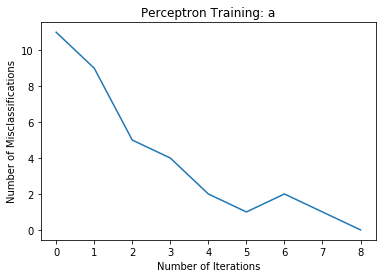

length: 11 [13, 9, 6, 3, 3, 2, 1, 2, 1, 2, 0]


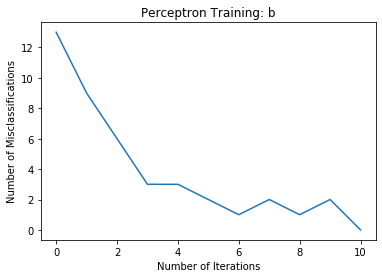

length: 44 [13, 9, 6, 3, 3, 3, 3, 1, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0]


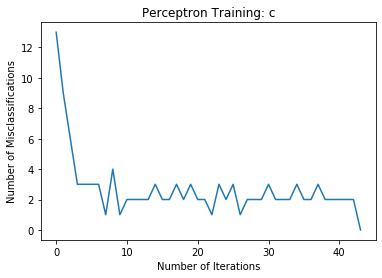

length: 6 [11, 7, 4, 3, 1, 0]


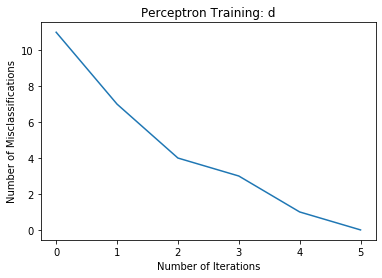

length: 18 [13, 8, 6, 4, 3, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 0]


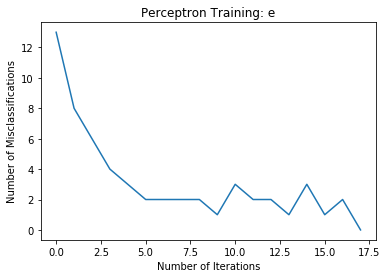

length: 22 [13, 9, 5, 5, 3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3, 0]


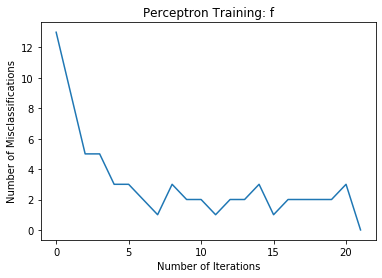

length: 8 [11, 9, 6, 3, 3, 2, 2, 0]


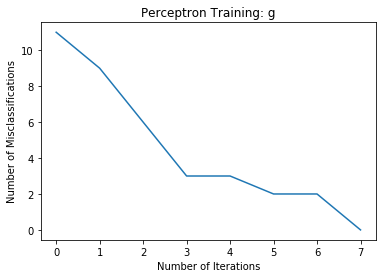

length: 13 [13, 9, 6, 4, 2, 1, 2, 2, 1, 2, 2, 2, 0]


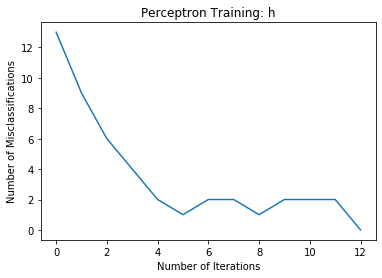

length: 5 [10, 6, 3, 2, 0]


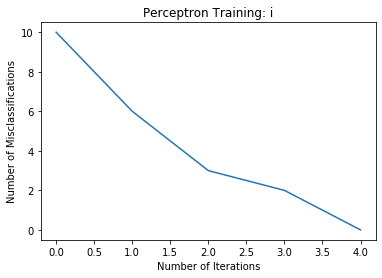

length: 6 [13, 7, 5, 3, 2, 0]


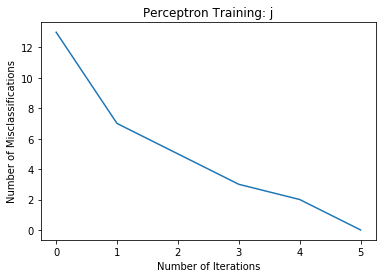

length: 5 [11, 7, 3, 3, 0]


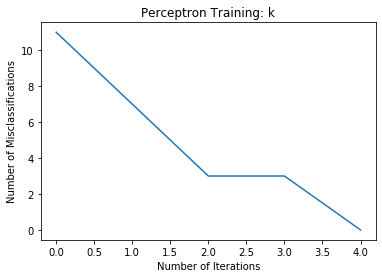

length: 8 [11, 7, 6, 4, 4, 2, 1, 0]


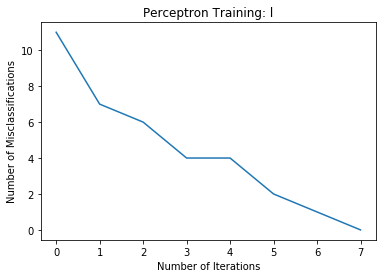

length: 8 [11, 7, 6, 4, 2, 1, 2, 0]


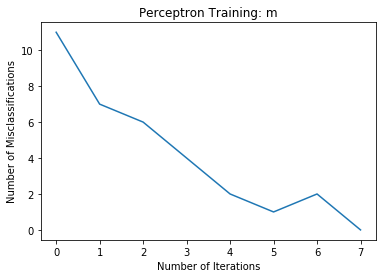

length: 10 [11, 9, 6, 4, 1, 1, 2, 1, 1, 0]


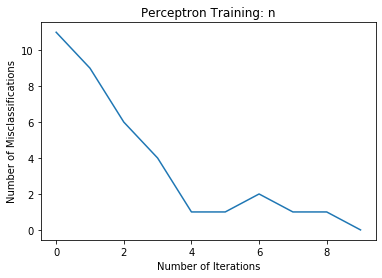

length: 22 [11, 9, 6, 4, 3, 3, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 4, 1, 2, 3, 2, 0]


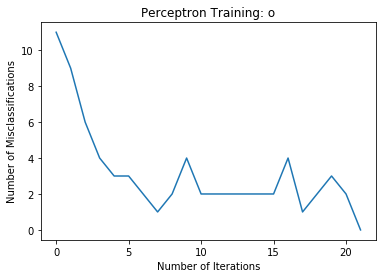

length: 17 [13, 9, 5, 5, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 3, 1, 0]


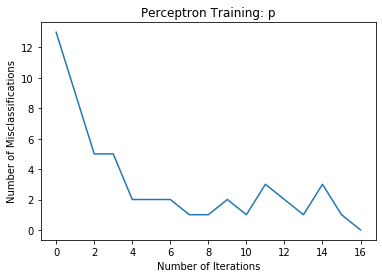

length: 8 [11, 7, 5, 5, 4, 2, 1, 0]


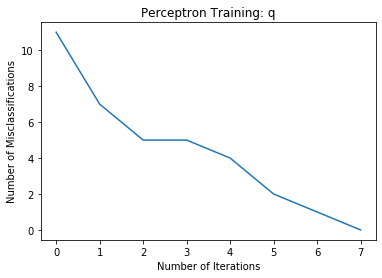

length: 13 [13, 9, 5, 4, 2, 2, 2, 2, 2, 1, 2, 1, 0]


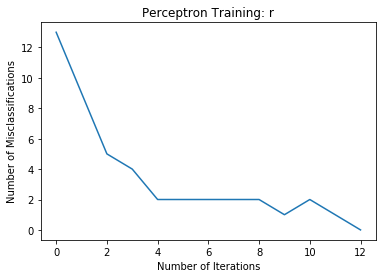

length: 11 [13, 8, 5, 4, 2, 3, 1, 2, 1, 1, 0]


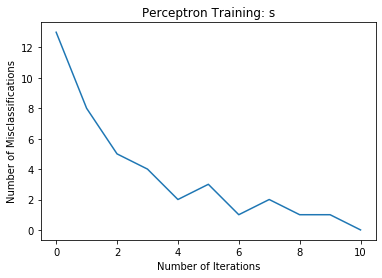

length: 18 [13, 8, 5, 4, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 0]


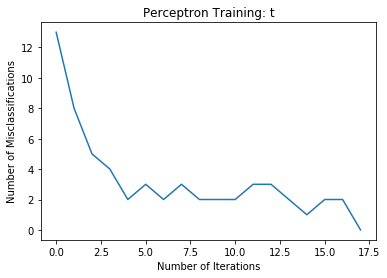

length: 8 [11, 7, 4, 5, 2, 2, 1, 0]


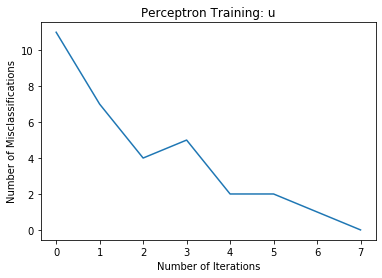

length: 6 [11, 7, 3, 3, 1, 0]


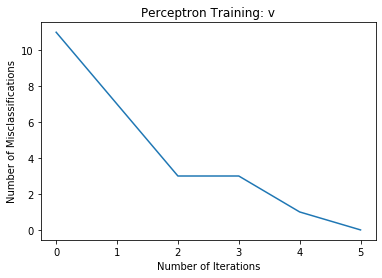

length: 12 [13, 9, 5, 4, 3, 1, 2, 2, 2, 1, 3, 0]


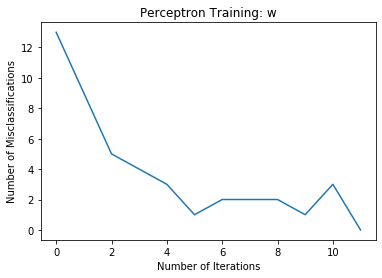

length: 12 [13, 9, 5, 3, 1, 2, 1, 1, 1, 1, 2, 0]


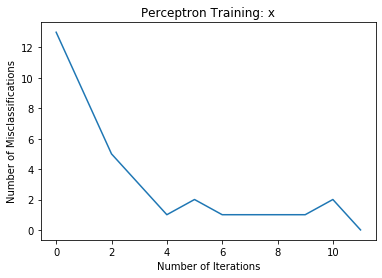

length: 12 [13, 8, 5, 4, 4, 2, 1, 3, 1, 1, 2, 0]


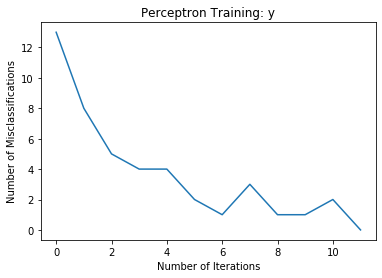

length: 15 [13, 8, 5, 4, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0]


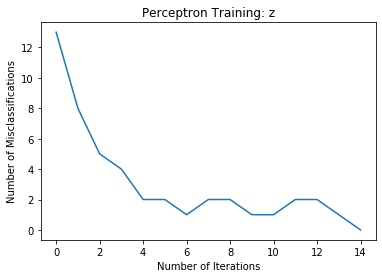

In [99]:
# Setup labels vector for recognizing 'A'
labels = [-1] * len(train_set)
labels[0] = 1

# Add +1 bias to beginning of all input vectors in training set
inputs = [[1] + train_set[i] for i in range(len(train_set))]

# randomize weights
np.random.seed(1)
weights = np.random.uniform(-1, 1, (len(inputs[0])))

# load in testing set
test_inputs = [[1] + test_set[i] for i in range(len(test_set))]

# convert to np.arrays
labels = np.asarray(labels)
inputs = np.asarray(inputs)
weights = np.asarray(weights)
test_inputs = np.asarray(test_inputs)

def step(x, threshold=0):
    return 1 if x > threshold else -1

# calculate output state for each input vector with weights, step output, compare to expected label
#X = zip(inputs, labels)
#for i, (a, b) in enumerate(X):
#    output = np.dot(weights, a)
#    prediction = step(output)
#    print(f'output (x_{i}): {output}, {prediction}, {"hit" if prediction == b else "miss"}')
    
def fit(weights, inputs, labels, activation=step, learning_rate=0.01, epochs=50):
    learning = True
    iters = 0
    misclasses = []
    
    # until all inputs classified properly, or enough epochs have passed
    while learning and iters < epochs:
        # predict output, compare to expected label, update weights
        misclass_count = 0
        learning = False
        
        for i, (ins, label) in enumerate(zip(inputs, labels)):
            output = np.dot(weights, ins)  # weighted sum
            prediction = activation(output)      # classify output
            
            if prediction != label:
                learning = True
                misclass_count += 1
                
                # update weights
                delta_w = learning_rate * (label - prediction) * ins
                weights = np.add(weights, delta_w)
                
            #print(f'output (x_{i}): {output}, {prediction}, {"hit" if prediction == label else "miss"}')
                
        # print(f'epoch {iters} : {misclass_count} misses\n')
        misclasses.append(misclass_count)
        iters = iters + 1
    return weights, misclasses

def plot(misclasses, title):
    print(f'length: {len(misclasses)} {misclasses}')
    fig, ax = plt.subplots()
    
    ax.set(xlabel='Number of Iterations', ylabel='Number of Misclassifications',
       title=f'Perceptron Training: {title}')
    
    xaxis = np.arange(0, len(misclasses), 1)
    yaxis = misclasses
    ax.plot(xaxis, yaxis)
    plt.show()
    

char_map = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
all_labels = [np.roll(labels, i) for i in range(len(labels))]  # generate labels for all letters we want to classify

for i, labels in enumerate(all_labels):
    # train the perceptron
    trained_weights, misclasses = fit(weights, inputs, labels, step)
    plot(misclasses, char_map[i])
    
    # test the perceptron
    #output = 